# Plot greenest cities on a map?

Now we have a GeoSJON file that contains the city, its geometry and a *green_fraction* value.

Can we plot this on an interactive map, as used in the Newspaper?

In [1]:
# First load your Google Drive.
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

# After mounting, check folders in left side-bar
# If this code does not work, you can use the "Mount Drive" button in the left side-bar

Mounted at /content/drive


In [ ]:
!pip install geemap

In [1]:
import pandas as pd
import geemap
from geemap import geojson_to_ee, ee_to_geojson
import json
from ipyleaflet import GeoJSON
from ipywidgets import Text, HTML
from ipyleaflet import WidgetControl, GeoJSON
import numpy as np
import folium

In [ ]:
# Set relevant directories
import os

# Your own baseline directory - if mounted under MyDrive, do not change.
BASE_DIR = os.path.join('/content/drive/MyDrive/BUCSS22')
print('BASE_DIR: ',BASE_DIR)

# Create a link to notebooks directory
YOUR_NAME = "Matthias_Lecturer" # Name of your own folder
NOTEBOOKS_DIR = os.path.join(BASE_DIR, YOUR_NAME, 'notebooks')
print('NOTEBOOKS_DIR: ',NOTEBOOKS_DIR)

# Other relevant folders
GEE_DIR         = os.path.join(BASE_DIR, 'DATA_SHARE', 'GEE')
OUT_DIR         = os.path.join(BASE_DIR, YOUR_NAME, 'output')
FIG_DIR         = os.path.join(BASE_DIR, YOUR_NAME, 'figures')
print('GEE_DIR: ',GEE_DIR)
print('OUT_DIR: ',OUT_DIR)
print('FIG_DIR: ',FIG_DIR)

# Set the population threshold to be used
POP_SIZE_THRES = 100000

FN_JSON = os.path.join(OUT_DIR, f"fc_cities_ndvi_{POP_SIZE_THRES}.geojson")

In [ ]:
import ee
ee.Authenticate()
ee.Initialize()

FN_EE_S2 = ee.Image("projects/ee-bucss-bot/assets/ndvi_germany_30m")

In [4]:
# Initialize a map
Map = geemap.Map(center=[51.163375,10.447683333], zoom=7, basemap='CartoDB.DarkMatter', width=1400, height=1000)

In [5]:
# Add the Sentinel-2 NDVI data to the map
cb_greens = [
  '101721' ,'282e36', '2f423d', '345744', '376d4b',
  '398552','399b58', '37b35e', '30cc64', '24e56a', '00ff70'
  ];

Map.addLayer(FN_EE_S2, {'min':0.45, 'max':1, 'palette':cb_greens}, 'S2 NDVI')

In [6]:
# Now also add the city polygons
style = {
    "stroke": True,
    "color": "#FFFFFF",
    "weight": 2,
    "opacity": 1,
    "fill": True,
    "fillColor": "#FFFFFF",
    "fillOpacity": 0.0,
}

hover_style = {"fillOpacity": 0.1}

Map.add_geojson(FN_JSON, layer_name="CITY", style=style, hover_style=hover_style)

In [7]:
Map

Map(center=[51.163375, 10.447683333], controls=(WidgetControl(options=['position', 'transparent_bg'], widget=H…

# Plot ranking of greenest city?

Make a figure with cities, starting with the greenest one.

Add-on: learn how to install a python package with a specific version number.

Example, matplotlib can automatically annotate bar plots with labels from version 3.4.0 ([Info here](https://matplotlib.org/3.4.0/users/whats_new.html#new-automatic-labeling-for-bar-charts))

In [ ]:
!pip install geopandas

In [ ]:
import geopandas as gpd
df = gpd.read_file(FN_JSON)

In [ ]:
# Reduce the dataframe, to what we need
df_sel = df[['CITY', 'green_fraction']].copy()
df_sel.sort_values(['green_fraction'], ascending=True, inplace=True)

# Reduce green fraction to 1 decimal
df_sel = df_sel.round({'green_fraction':1})

In [ ]:
df_sel

,CITY,green_fraction
33,Erfurt,47.1
19,Mannheim,52.4
12,N�rnberg,53.9
6,Leipzig,57.0
29,Magdeburg,57.0
...,...,...
39,Saarbr�cken,82.6
55,Pforzheim,84.5
58,G�ttingen,85.2
67,Salzgitter,85.3


In [ ]:
import matplotlib as mpl
print(mpl.__version__)

3.4.0


In [ ]:
!pip install matplotlib==3.4.0

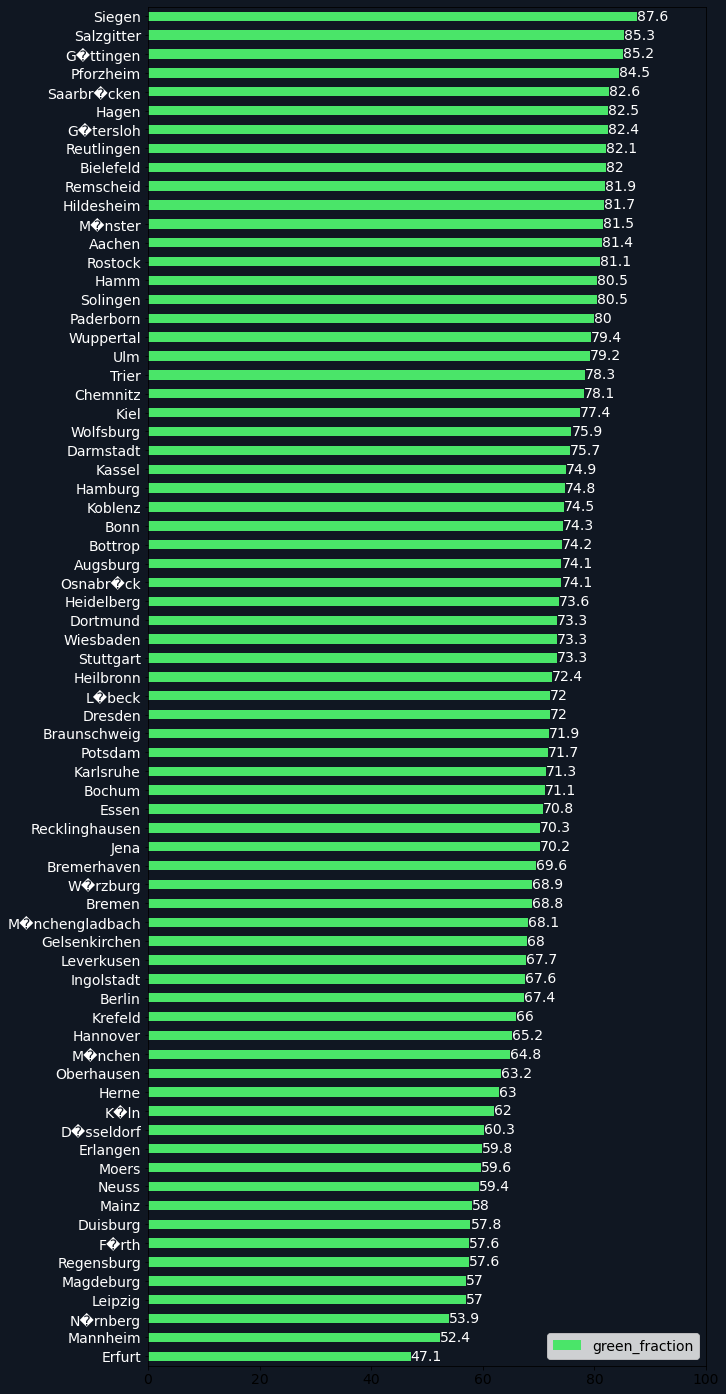

In [ ]:
import matplotlib.pyplot as plt

plt.rcParams.update({'font.size': 14})

fig,ax = plt.subplots(1,1, figsize=(10,25), facecolor='#101722')
df_sel[['CITY', 'green_fraction']].plot.barh(ax=ax, color="#4ae569")
ax.set_facecolor("#101722")
ax.bar_label(ax.containers[0], color="#FFFFFF")
ax.set_yticklabels(labels=df_sel['CITY'], color="#FFFFFF")
ax.set_xlim(0,100)

OFILE = os.path.join(
    FIG_DIR,
    "Greenest_city_raking.jpg"
)
plt.savefig(OFILE, dpi=300)